In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches

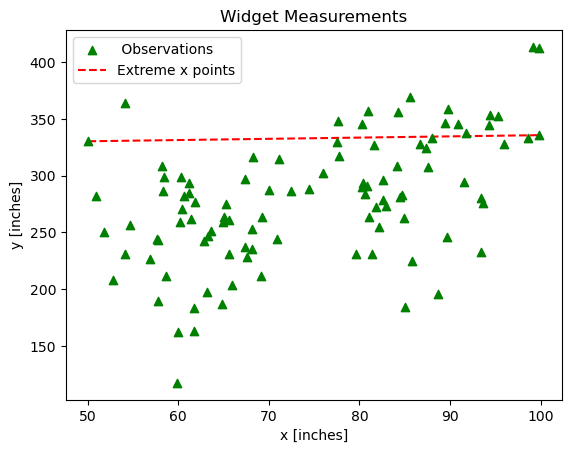

In [45]:
##########Part 1-1
data = np.genfromtxt("scatter_data.csv", delimiter=",", comments="%")
x = data[:, 0]
y = data[:, 1]
leftmost_point = x.min()
rightmost_point = x.max()

line_x = np.array([leftmost_point, rightmost_point])
line_y = np.array([y[np.where(x == leftmost_point)[0][0]], y[np.where(x == rightmost_point)[0][0]]])

plt.scatter(x, y, marker="^", color="green", label=" Observations")

plt.plot(line_x, line_y, color="red", linestyle="--", label="Extreme x points", zorder=0)

plt.legend(loc="upper left")
plt.title("Widget Measurements")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")
plt.show()

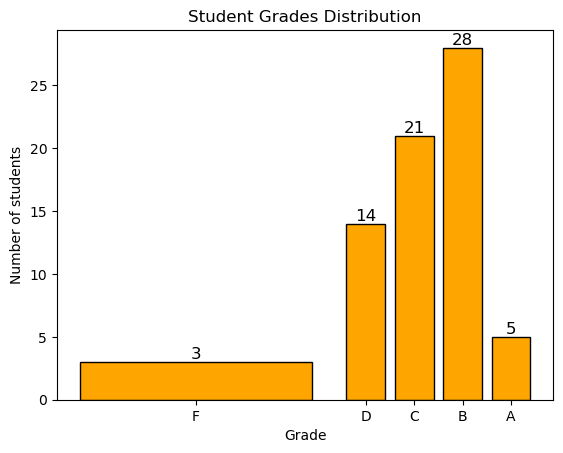

In [ ]:
########Part 1-2

data = np.genfromtxt("student_grades.csv", delimiter=",", comments="%")
student_grades = data[:, 1]


bin_edges = [0, 60, 70, 80, 90, 100]
letter_grades = ['F', 'D', 'C', 'B', 'A']


n, bins, patches = plt.hist(student_grades, bins=bin_edges, color="orange", edgecolor="black", rwidth=0.8)

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")


ax = plt.gca()


for bar, grade in zip(patches, letter_grades):
    height = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=12)

bin_centers = [0.5 * (bin_edges[i] + bin_edges[i + 1]) for i in range(len(bin_edges) - 1)]
plt.xticks(bin_centers, letter_grades)


plt.show()



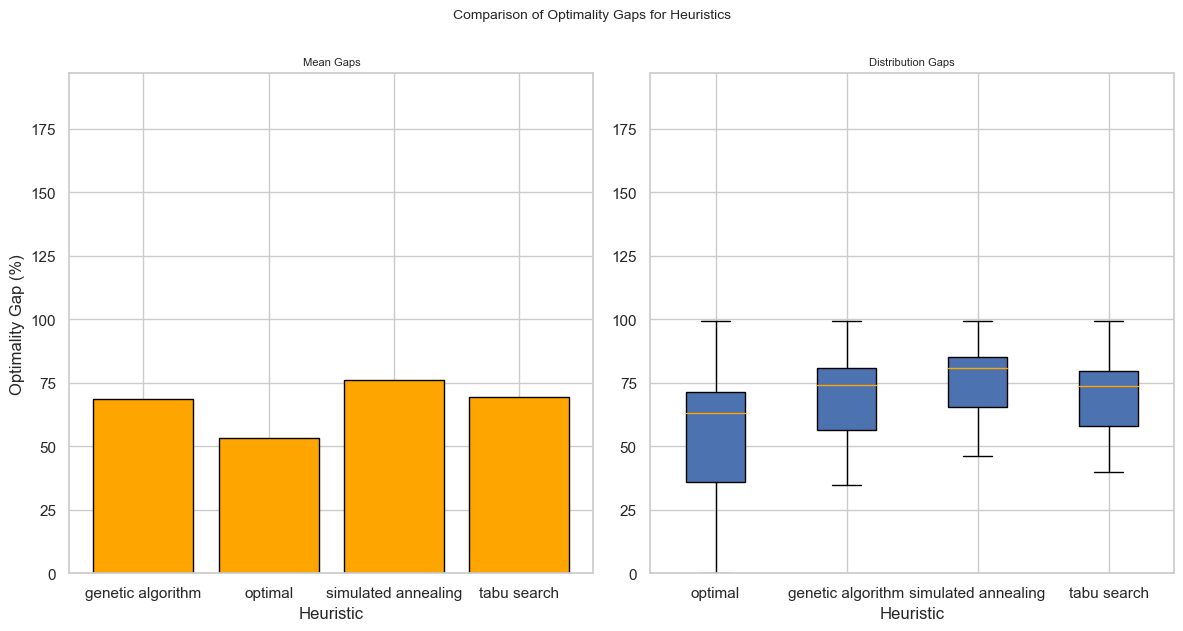

In [173]:
#########Part 1-3
import pandas as pd

data = pd.read_csv("solution_data.csv", header=None, comment="%")

#first subplot
colors = {
    "optimal": "orange",
    "genetic algorithm": "orange",
    "simulated annealing": "orange",
    "tabu search": "orange",
}

max_value = data[2].max()


data["Optimality Gap"] = (max_value - data[2]) / max_value * 100


filtered_data = data[data[1].isin(colors.keys())]


average_gaps = filtered_data.groupby(1)["Optimality Gap"].mean()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bars = axs[0].bar(average_gaps.index, average_gaps, color=colors.values(), edgecolor="black")
axs[0].set_xticks(range(len(average_gaps.index)))
axs[0].set_xticklabels(average_gaps.index)
axs[0].set_xlabel("Heuristic")
axs[0].set_ylabel("Optimality Gap (%)")
axs[0].set_title("Mean Gaps",fontsize=8)

#Second subplot

boxplot_data = [filtered_data[filtered_data[1] == heuristic]["Optimality Gap"] for heuristic in colors.keys()]
medianprops = dict(color="orange")
box = axs[1].boxplot(boxplot_data, labels=colors.keys(), patch_artist=True, medianprops=medianprops)
axs[1].set_xlabel("Heuristic")

axs[1].set_title("Distribution Gaps",fontsize=8)

axs[0].set_ylim([0, max_value])
axs[1].set_ylim([0, max_value])

plt.tight_layout()

plt.suptitle("Comparison of Optimality Gaps for Heuristics", fontsize=10,y=1.05)
plt.show()


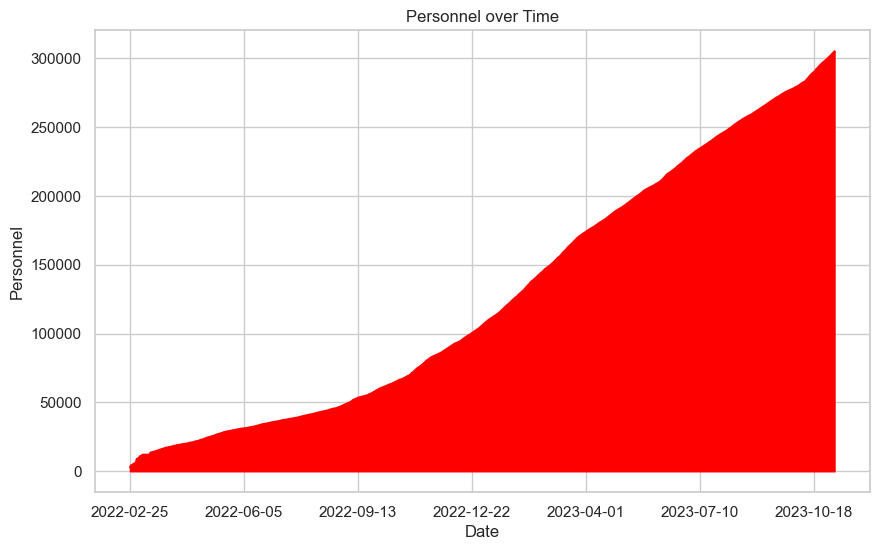

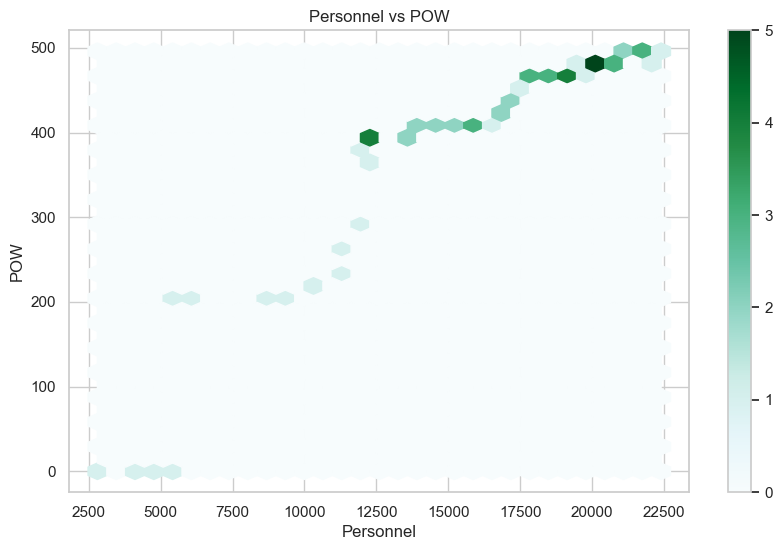

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact



# Load the data
df = pd.read_csv("russia_losses_personnel.csv")

####Area Plot

df.set_index('date')['personnel'].plot(kind='area', figsize=(10,6),color ='red')
plt.title('Personnel over Time')
plt.xlabel('Date')
plt.ylabel('Personnel')
plt.show()


####Hexbin Plot
df.plot(kind='hexbin', x='personnel', y='POW', gridsize=30, figsize=(10,6))
plt.title('Personnel vs POW')
plt.xlabel('Personnel')
plt.ylabel('POW')
plt.show()


##### 3D plot
import plotly.express as px

# Assuming that 'day', 'personnel', and 'POW' are columns in your DataFrame
fig = px.scatter_3d(df, x='day', y='personnel', z='POW',
                    color='day', size='personnel', opacity=0.9)

# Tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


